In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


### 1 How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Answer<br>

$
X = {\begin{bmatrix}
x1 & x2 & x3 \\
x4 & x5 & x6 \end{bmatrix}}_{2\times 3}
$

$
y = {\begin{bmatrix}
y1 & y2 \\
y3 & y4 \\
y5 & y6 
\end{bmatrix}}_{3\times 2}
$


$
P = {\begin{bmatrix}
x1 y1+x2y3+x3y5 & x1y2+2y4+x3y6\\
x4y1+x5y3+x6y5 & x4y2+x5y4+x6y6
\end{bmatrix}}_{2\times 2}
$

Number of multiplications = n * k * m = 2 x 3 x 2

Number of additions = n * (k-1) * m = 2 x (3-1) x 2


## 2 Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [47]:
import time
# 3x4
A = [[1,2,3,2], 
     [4,5,6,1],
     [4,2,1,7]]

# 4x5
B = [[6,2,3,2,2],
     [8,1,2,5,3],
     [9,2,0,7,5],
     [0,2,5,9,1]]

# 3x5 

def mul(A,B):
  res = [[0 for i in range(5)] for j in range(3)]
  for i in range(len(A)):
      for j in range(len(B)):
          for k in range(len(B[0])):
              res[i][k] += A[i][j] * B[j][k]
  return res

%timeit res = mul(A,B)


20.3 µs ± 125 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [48]:
A = np.array( [[1,2,3,2], 
     [4,5,6,1],
     [4,2,1,7]])
B = np.array([[6,2,3,2,2],
     [8,1,2,5,3],
     [9,2,0,7,5],
     [0,2,5,9,1]])

%timeit result = np.matmul(A,B)

1.29 µs ± 6.81 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## 3 Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

If the given array is odd the median will be midddle element and if given array is even than median will be average of middle two elements in sorted array.
Here, the given array is not sorted.

<br>
As per the mentioned method i.e. finding hightest element in first pass and second highest element in second pass and so on to find median. This will take O(n/2 * n) which will be O(n^2).
<br><br>
Better approach is to sort the array first and return middle element(if array size odd) else return average of middle two element(if array size is even).
This will take O(n log(n)) time.


In [20]:
# Given approach
arr = [7,3,4, 9,5,2, 0,1, 2,4,1, 2,8,7]
def findmedain(arr):
  for i in range(len(arr)//2+ 1):
    for j in range(0, len(arr)-i-1):
      if arr[j] < a[j+1]:
        arr[j],arr[j+1] = arr[j+1], arr[j]
  

  if len(arr)%2==0:
    return arr[ ((int) ((len(arr)+1)/2))-1 ]
  else:
    return arr[(int)(len(arr)/2)] + arr[ ((int) ((len(arr)+1)/2))-1 ]

%timeit findmedian(arr)
print(findmedian(arr))

621 ns ± 8.63 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
3.5


In [14]:
# better approach by sorting array first
arr = [7,3,4, 9,5,2, 0,1, 2,4,1, 2,8,7]
def findmedian(arr):
  arr.sort()

  if len(arr)%2==0:
    median = (arr[len(arr)//2 -1] + arr[len(arr)//2] )/2
  else:
    median = arr[len(arr)//2]
  return median
%timeit median = findmedian(arr)
print(median)

639 ns ± 33.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
3.5


In [15]:
# using numpy
arr = np.array( [7,3,4, 9,5,2, 0,1, 2,4,1, 2,8,7])
%timeit median = np.median(arr)
print(median)

21.8 µs ± 639 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
3.5


# 4 What is the gradient of the following function with respect to x and y?
#    x^2 * y + y^3 * sin(x)



gradient wrt x:
2xy + x^2 (dy/dx) + y^3 * cos(x) + 3 *  y ^ 2 * (dy/dx) *sin(x)
<br>= 2xy +y^3 cos(x) 
<br>
gradient wrt y:<br>
2x dx/dy * y + x^2 + 3 y^2 * sin(x) + y^3 * cox(x) dx/dy
<br>=x^2 + 3y^2 sin(x) 


## 5 Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [136]:
import jax.numpy as jnp
import jax
import math
def fun(x,y):
  return (x**2) * y + (y**3) * jnp.sin(x)

x = jnp.array([1.0,2.0,3.0,2.9], float)
y = jnp.array([1.0,2.0,3.0,2.5], float)

print('gradient with respect to x')
for a,b in zip(x,y):
  r = jax.grad(fun, argnums=0)(a,b)
  print(r)
print('-----')
print('gradient with respect to x')
for a,b in zip(x,y):
  r = jax.grad(fun, argnums=1)(a,b)
  print(r)



gradient with respect to x
2.5403023
4.670825
-8.729797
-0.67122173
-----
gradient with respect to x
3.5244129
14.911569
12.81024
12.895924


## 6 Use sympy to confirm that you obtain the same gradient analytically.

In [51]:
from sympy import *
x , y = symbols('x,y')

diff_x = diff (  (x**2) * y + (y**3) * sin(x)  , x)

diff_y = diff (  (x**2) * y + (y**3) * sin(x)  , y)


In [52]:
diff_x

2*x*y + y**3*cos(x)

In [53]:
diff_y

x**2 + 3*y**2*sin(x)

In [137]:
x = jnp.array([1.0,2.0,3.0,2.9], float)
y = jnp.array([1.0,2.0,3.0,2.5], float)

print('gradient with respect to x')
for a,b in zip(x,y):
  r = 2*a*b + b**3 * math.cos(a)
  print(r)
print('----')
print('gradient with respect to y')
for a,b in zip(x,y):
  r = a**2 + 3 * b**2 * math.sin(a)
  print(r)


gradient with respect to x
2.5403023
4.670825
-8.729797
-0.67122173
----
gradient with respect to y
3.5244129
14.911569
12.81024
12.895924


### 7 Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks

In [100]:
dic = { 
          '2022':{'1 Branch': {1: {'roll number':1, 'Name':'A', 'Marks':{'Maths':random.randint(70,100), 'English': random.randint(70,100)} },
                               2: {'roll number':2, 'Name':'B', 'Marks':{'Maths':random.randint(70,100), 'English': random.randint(70,100)}},
                              },
                  '2 Branch': {1: {'roll number':1, 'Name':'A', 'Marks':{'Maths':random.randint(70,100), 'English': random.randint(70,100)} },
                               2: {'roll number':2, 'Name':'B', 'Marks':{'Maths':100, 'English': 70}}
                               } 
                  },
          '2023':{'1 Branch': {1: {'roll number':1, 'Name':'A', 'Marks':{'Maths':random.randint(70,100), 'English': random.randint(70,100)} },
                               2: {'roll number':2, 'Name':'B', 'Marks':{'Maths':random.randint(70,100), 'English': random.randint(70,100)}},
                              },
                  '2 Branch': {1: {'roll number':1, 'Name':'A', 'Marks':{'Maths':random.randint(70,100), 'English': random.randint(70,100)} },
                               2: {'roll number':2, 'Name':'B', 'Marks':{'Maths':random.randint(70,100), 'English': random.randint(70,100)}}
                               } 
                  },
          '2024':{'1 Branch': {1: {'roll number':1, 'Name':'A', 'Marks':{'Maths':random.randint(70,100), 'English': random.randint(70,100)} },
                               2: {'roll number':2, 'Name':'B', 'Marks':{'Maths':random.randint(70,100), 'English': random.randint(70,100)}},
                              },
                  '2 Branch': {1: {'roll number':1, 'Name':'A', 'Marks':{'Maths':random.randint(70,100), 'English': random.randint(70,100)} },
                               2: {'roll number':2, 'Name':'B', 'Marks':{'Maths':random.randint(70,100), 'English': random.randint(70,100)}}
                               } 
                  },
          '2025':{'1 Branch': {1: {'roll number':1, 'Name':'A', 'Marks':{'Maths':random.randint(70,100), 'English': random.randint(70,100)} },
                               2: {'roll number':2, 'Name':'B', 'Marks':{'Maths':random.randint(70,100), 'English': random.randint(70,100)}},
                              },
                  '2 Branch': {1: {'roll number':1, 'Name':'A', 'Marks':{'Maths':random.randint(70,100), 'English': random.randint(70,100)} },
                               2: {'roll number':2, 'Name':'B', 'Marks':{'Maths':random.randint(70,100), 'English': random.randint(70,100)}}
                               } 
                  }
       }

In [101]:
for i in dic.keys():
  print(i)
  for j in dic[i].keys():
    print('  ',j)
    for k in dic[i][j].keys():
      # print(k)
      print('     ',dic[i][j][k])

2022
   1 Branch
      {'roll number': 1, 'Name': 'A', 'Marks': {'Maths': 88, 'English': 89}}
      {'roll number': 2, 'Name': 'B', 'Marks': {'Maths': 73, 'English': 86}}
   2 Branch
      {'roll number': 1, 'Name': 'A', 'Marks': {'Maths': 84, 'English': 98}}
      {'roll number': 2, 'Name': 'B', 'Marks': {'Maths': 100, 'English': 70}}
2023
   1 Branch
      {'roll number': 1, 'Name': 'A', 'Marks': {'Maths': 98, 'English': 87}}
      {'roll number': 2, 'Name': 'B', 'Marks': {'Maths': 88, 'English': 77}}
   2 Branch
      {'roll number': 1, 'Name': 'A', 'Marks': {'Maths': 90, 'English': 91}}
      {'roll number': 2, 'Name': 'B', 'Marks': {'Maths': 97, 'English': 96}}
2024
   1 Branch
      {'roll number': 1, 'Name': 'A', 'Marks': {'Maths': 86, 'English': 73}}
      {'roll number': 2, 'Name': 'B', 'Marks': {'Maths': 83, 'English': 77}}
   2 Branch
      {'roll number': 1, 'Name': 'A', 'Marks': {'Maths': 81, 'English': 79}}
      {'roll number': 2, 'Name': 'B', 'Marks': {'Maths': 92, 'Eng

### 8) Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [57]:
class Student:
  def __init__(self, RollNumber, Name):
    self.RollNumber = RollNumber
    self.Name = Name
    self.Marks = {'Maths':random.uniform(5,10), 'Science': random.uniform(5,10)}

In [58]:
class Branch:
  def __init__(self, branchName):
    self.branchName = branchName
    self.Students_list = []
  
  def add_student(self, student):
    self.Students_list.append(student)

In [59]:
class Year:
  def __init__(self, year_num):
    self.year_num = year_num
    self.branch_list = list()
  
  def add_branch(self, branch):
    self.branch_list.append(branch)

In [60]:
result = []
for y in range(2019,2022):
  year = Year(y)
  for b in range(1,4):
    branch = Branch(str(b) )
    for r in range(1,4):
      student = Student(r, chr(64 + r))
      branch.add_student(student)
    year.add_branch(branch)
  result.append(year)
  

In [61]:
for y in result:
  print('Year ',y.year_num,'--------------')
  for b in y.branch_list:
    print('   Branch ',b.branchName)
    for s in b.Students_list:
      print('      Roll: ',s.RollNumber,' Name:-- ', s.Name,' Marks:--', s.Marks)

Year  2019 --------------
   Branch  1
      Roll:  1  Name:--  A  Marks:-- {'Maths': 5.475310971274419, 'Science': 5.582711068882525}
      Roll:  2  Name:--  B  Marks:-- {'Maths': 7.311261130480521, 'Science': 9.362250692247441}
      Roll:  3  Name:--  C  Marks:-- {'Maths': 7.3054667513381455, 'Science': 8.05741130117941}
   Branch  2
      Roll:  1  Name:--  A  Marks:-- {'Maths': 8.35059650585491, 'Science': 8.145393403061941}
      Roll:  2  Name:--  B  Marks:-- {'Maths': 8.762127739804452, 'Science': 8.905848183247441}
      Roll:  3  Name:--  C  Marks:-- {'Maths': 8.316640162910675, 'Science': 9.569243467444675}
   Branch  3
      Roll:  1  Name:--  A  Marks:-- {'Maths': 8.142804905450754, 'Science': 6.1237036967019405}
      Roll:  2  Name:--  B  Marks:-- {'Maths': 6.238862439372097, 'Science': 9.26242054007455}
      Roll:  3  Name:--  C  Marks:-- {'Maths': 6.021495851155264, 'Science': 5.079817050386336}
Year  2020 --------------
   Branch  1
      Roll:  1  Name:--  A  Marks

## 9 Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.


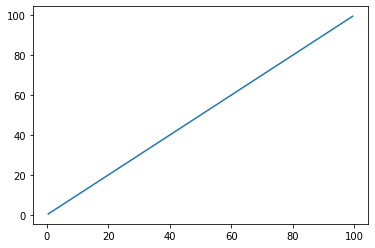

In [62]:
# 1) y=x
x = np.arange(0.5, 100, 0.5)
def f(x):
  return x
plt.plot(x,f(x))


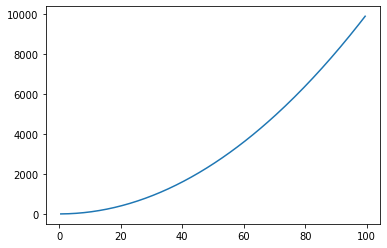

In [63]:
# 2) y = x^2
x = np.arange(0.5, 100, 0.5)
def f(x):
  return x**2
plt.plot(x,f(x))


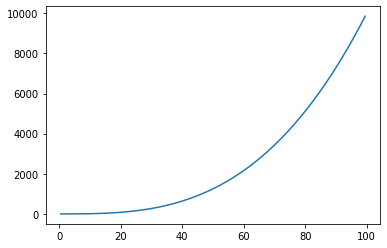

In [64]:
# 3) y=x^3/100
x = np.arange(0.5, 100, 0.5)
def f(x):
  return (x**3)/100
plt.plot(x,f(x))


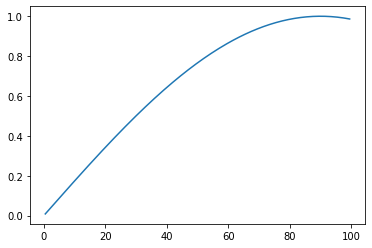

In [66]:
# 4) y=sin(x)
x = np.arange(0.5, 100, 0.5)
def f(x):
  x = x* np.pi / 180
  return jnp.sin(x)
plt.plot(x,f(x))


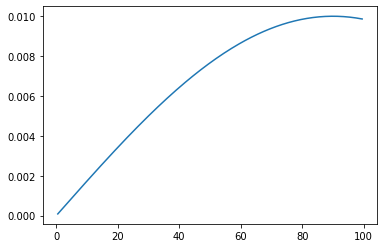

In [67]:
# 5) y=sin(x) / 100
x = np.arange(0.5, 100, 0.5)
def f(x):
  return jnp.sin(x * np.pi /180) /100
plt.plot(x,f(x))


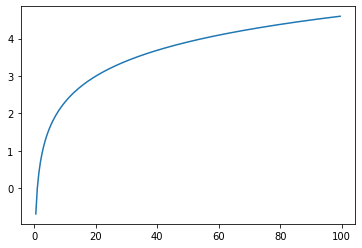

In [32]:
# 6) y=log(x)
x = np.arange(0.5, 100, 0.5)
def f(x):
  return jnp.log(x)
plt.plot(x,f(x))


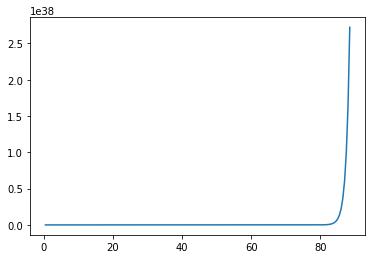

In [33]:
# 7) y=e^x
import math
x = jnp.arange(0.5, 100, 0.5)
def f(x):
  return jnp.exp(x)
plt.plot(x,f(x))


## 10 Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [109]:
x = np.random.uniform(1,2, size=(20,5))
print(x)

[[1.93726408 1.06996495 1.7043704  1.36432747 1.21853985]
 [1.60282083 1.18138684 1.72373145 1.70425187 1.76196642]
 [1.66501198 1.12581671 1.71204095 1.38898223 1.04394896]
 [1.17969946 1.36650269 1.64391925 1.90931533 1.29420255]
 [1.43635609 1.0957237  1.62640261 1.39507245 1.16104361]
 [1.24147009 1.00665014 1.14955073 1.95923761 1.76933538]
 [1.69727317 1.82908927 1.43669686 1.42323507 1.4380242 ]
 [1.86441363 1.73807818 1.76748077 1.69076474 1.16094553]
 [1.54049034 1.31634839 1.85651531 1.6619643  1.42545538]
 [1.72139731 1.88941491 1.72182452 1.75397391 1.55112453]
 [1.38680408 1.95043411 1.45420531 1.35448651 1.74313421]
 [1.76326812 1.94296354 1.58094123 1.1548879  1.29513514]
 [1.1825792  1.21699499 1.31053261 1.07621746 1.52281104]
 [1.92410156 1.75309463 1.2869452  1.59928835 1.67438727]
 [1.53753076 1.75677878 1.20083414 1.65850116 1.80697601]
 [1.38402628 1.71768217 1.49102163 1.79775394 1.57937375]
 [1.61604449 1.54302365 1.53676612 1.24012103 1.87071315]
 [1.79264449 1

In [110]:
df = pd.DataFrame(x)
df.columns = ['a','b','c','d','e']

In [111]:
df

,a,b,c,d,e
0,1.937264,1.069965,1.704370,1.364327,1.218540
1,1.602821,1.181387,1.723731,1.704252,1.761966
2,1.665012,1.125817,1.712041,1.388982,1.043949
3,1.179699,1.366503,1.643919,1.909315,1.294203
4,1.436356,1.095724,1.626403,1.395072,1.161044
5,1.241470,1.006650,1.149551,1.959238,1.769335
6,1.697273,1.829089,1.436697,1.423235,1.438024
7,1.864414,1.738078,1.767481,1.690765,1.160946
8,1.540490,1.316348,1.856515,1.661964,1.425455
9,1.721397,1.889415,1.721825,1.753974,1.551125


In [112]:
df.std() 

a    0.236069
b    0.334863
c    0.227594
d    0.268327
e    0.257812
dtype: float64

In [116]:
df.iloc[:, [df.std().argmax()]]  # column with the highest standard deviation

,b
0,1.069965
1,1.181387
2,1.125817
3,1.366503
4,1.095724
5,1.006650
6,1.829089
7,1.738078
8,1.316348
9,1.889415


In [117]:
df.mean(axis=1)

0     1.458893
1     1.594831
2     1.387160
3     1.478728
4     1.342920
5     1.425249
6     1.564864
7     1.644337
8     1.560155
9     1.727547
10    1.577813
11    1.547439
12    1.261827
13    1.647563
14    1.592124
15    1.593972
16    1.561334
17    1.497416
18    1.635303
19    1.749063
dtype: float64

In [118]:
df.mean(axis=1).argmin()

12

In [124]:
df[:][df.mean(axis=1).argmin():df.mean(axis=1).argmin()+1] # row with the lowest mean.

,a,b,c,d,e
12,1.182579,1.216995,1.310533,1.076217,1.522811


#### 11) Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [125]:
# Add a new column to the dataframe called “f” which is the sum of the columns
df['f'] = df.sum(axis=1) 

In [127]:
# Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise.

df['g'] = ['LT8' if i<8 else 'GT8' for i in df['f']]

In [135]:
df

,a,b,c,d,e,f,g
0,1.937264,1.069965,1.704370,1.364327,1.218540,7.294467,LT8
1,1.602821,1.181387,1.723731,1.704252,1.761966,7.974157,LT8
2,1.665012,1.125817,1.712041,1.388982,1.043949,6.935801,LT8
3,1.179699,1.366503,1.643919,1.909315,1.294203,7.393639,LT8
4,1.436356,1.095724,1.626403,1.395072,1.161044,6.714598,LT8
5,1.241470,1.006650,1.149551,1.959238,1.769335,7.126244,LT8
6,1.697273,1.829089,1.436697,1.423235,1.438024,7.824319,LT8
7,1.864414,1.738078,1.767481,1.690765,1.160946,8.221683,GT8
8,1.540490,1.316348,1.856515,1.661964,1.425455,7.800774,LT8
9,1.721397,1.889415,1.721825,1.753974,1.551125,8.637735,GT8


In [132]:
#  number of rows in the dataframe where the value in the column “g” is “LT8”
df[df['g'] == 'LT8'][['g']].shape[0]

15

In [133]:
# standard deviation of the column “f” for the rows where the value in the column “g” is “LT8”

df[df['g']=='LT8'][['f']].std()

f    0.513861
dtype: float64

In [134]:
# standard deviation of the column “f” for the rows where the value in the column “g” is “GT8”

df[df['g']=='GT8'][['f']].std() 

f    0.266334
dtype: float64

##  12 Write a small piece of code to explain broadcasting in numpy.

In [106]:
a = np.tile(np.array([10,20,30,40]), (3,1))
print(a)
a = a.T
print(a)

b = np.array([2,3,4])
print(b)

print(a + b)

[[10 20 30 40]
 [10 20 30 40]
 [10 20 30 40]]
[[10 10 10]
 [20 20 20]
 [30 30 30]
 [40 40 40]]
[2 3 4]
[[12 13 14]
 [22 23 24]
 [32 33 34]
 [42 43 44]]


In [108]:
a = np.array([10,20,30,40])
a = a[:, np.newaxis]
print('A:-')
print(a)

b = np.array([2,3,4])
print('B:-')
print(b)

print('A+B :-')
print(a+b)

A:-
[[10]
 [20]
 [30]
 [40]]
B:-
[2 3 4]
A+B :-
[[12 13 14]
 [22 23 24]
 [32 33 34]
 [42 43 44]]


## 13 Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [102]:
def mini(a):
  val = a.ravel().tolist().index(min(a.ravel()))
  return val

In [103]:
x = np.array([  
                [[9,4,1,7], [8,7,-1,0], [1,2,4,0]], 
                [[8,7,-1,0], [1,2,4,0], [9,4,1,7]],
                [[9,4,1,7], [8,7,1,0], [-1,2,4,0]],
              ] )
result = mini(x)
print(result)

6


In [104]:
x.argmin() # to check

6